## 초승달 데이터 클러스터링

- DBSCAN을 이용한 군집 생성 및 이상치 탐지
- `make_moons` 데이터셋 사용

### DBSCAN

> Density-Based Spatial Clustering of Applications with Noise

밀도 기반 군집화 알고리즘으로 밀도가 높은 데이터 포인트(지점)을 클러스터로 묶고, 낮은 지역은 이상치로 간주하는 비지도 학습의 일종. 특정한 지점의 인근 지점도 하나의 클러스터라면 병합 가능한 거리인지 확인하여 병합하며 규모를 키워나간다.

데이터의 모양에 구애받지 않고 군집 반경과 군집에 포함되는 최소 샘플 수를 설정할 수 있는 특징을 갖는다.

단, 군집 간 밀도 차이가 크고 매개변수를 정해야 한다.

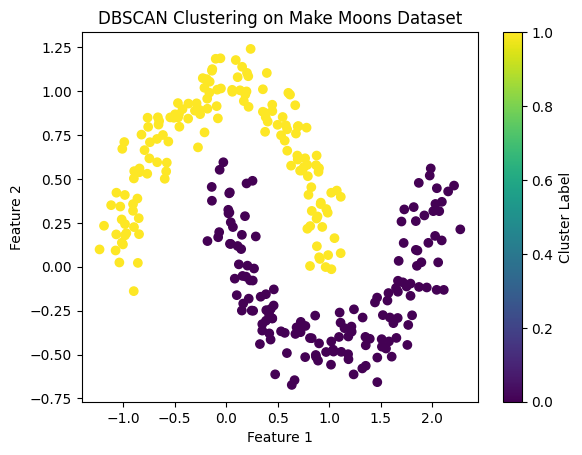

이상치 개수  0


In [35]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=300, noise=0.1, random_state=42)

ds = DBSCAN(eps=0.2, min_samples=5)
result = ds.fit(x)

plt.scatter(x[:,0], x[:,1], c=ds.labels_)
plt.colorbar(label="Cluster Label")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering on Make Moons Dataset")
plt.show()

outOfRange = 0
for i in ds.labels_:
  if i == -1:
    outOfRange += 1

print("이상치 개수 ", outOfRange)

## 와인 품질 데이터셋에서의 DBSCAN

In [70]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

x, y = load_wine(return_X_y=True)
x = StandardScaler().fit_transform(x)

ds = DBSCAN(eps=3, min_samples=3)
result = ds.fit(x)

outOfRange = 0
for i in ds.labels_:
  if i == -1:
    outOfRange += 1

clusters = []
for i in ds.labels_:
  if i not in clusters:
    clusters.append(i)

print("이상치 개수 ", outOfRange)
print("클러스터 개수 ", len(clusters))
print("이상치 비율", outOfRange / len(ds.labels_) * 100)

이상치 개수  7
클러스터 개수  3
이상치 비율 3.932584269662921
